# Power spectra of SSTA

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
from tqdm import tqdm
import sys
import calendar
from scipy import signal

# Strong

In [17]:
case_name = 'Strong'
years = '[2-3]'

In [18]:
FS = 40 # Sampling frequency 40 per 100 km, resolution 2.5 km

# Zonal-mean filter

In [19]:
heat_balance_zonal = glob.glob('../monthly_ml_heat_budget_large_mesoscale/'
                                + case_name + '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_zonal = sorted(heat_balance_zonal)
#heat_balance_zonal

In [20]:
heat_zonal = xr.open_mfdataset(heat_balance_zonal[:], concat_dim = 'ocean_time', combine = 'nested')

In [21]:
SSTA_zonal_Strong = heat_zonal.SSTA.data.compute()

In [22]:
wavenumber_zonal_Strong, PSD_zonal_Strong = signal.welch(SSTA_zonal_Strong[:, 60:350, 60:1062], FS)

# Full SST

In [23]:
SST_full_Strong = heat_zonal.SST.data.compute()

In [24]:
wavenumber_full_Strong, PSD_full_Strong = signal.welch(SST_full_Strong[:, 60:350, 60:1062], FS)   

# 300-km filter

In [25]:
def eddy_filter_300km(var):
    '''
    Input: varibale numpy arary with dimensions [time, z, y, z]
    Return: 500km-rolling-mean var and eddy fields
    '''
    from scipy.ndimage import uniform_filter
    var_500km_mean, var_eddy = np.ma.masked_all(var.shape), np.ma.masked_all(var.shape)
        
    for t in range(var.shape[0]):
        var_500km_mean[t] = uniform_filter(var[t], size = 120, mode = 'constant')
        var_eddy[t]       = var[t] - var_500km_mean[t]
    return var_500km_mean, var_eddy

In [26]:
SSTmean_300_Strong, SSTA_300_Strong = eddy_filter_300km(SST_full_Strong)

In [27]:
wavenumber_300_Strong, PSD_300_Strong =signal.welch(SSTA_300_Strong[:, 60:350, 60:1062], FS)

# Weak

In [28]:
case_name = 'Weak'
years = '[2-3]'

# Zonal-mean filter

In [30]:
heat_balance_zonal = glob.glob('../monthly_ml_heat_budget_large_mesoscale/'
                                + case_name + '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_zonal = sorted(heat_balance_zonal)
heat_balance_zonal

['../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-01_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-02_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-03_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-04_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-05_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-06_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-07_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-08_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-09_WeakEddies.nc',
 '../monthly_ml_heat_budget_large_mesoscale/Weak/monthly_ml_heat_balance_2016-10_WeakEddies.nc',
 '../monthly_ml_heat_budget_la

In [31]:
heat_zonal = xr.open_mfdataset(heat_balance_zonal[:], concat_dim = 'ocean_time', combine = 'nested')

In [32]:
SSTA_zonal_Weak = heat_zonal.SSTA.data.compute()

In [33]:
wavenumber_zonal_Weak, PSD_zonal_Weak = signal.welch(SSTA_zonal_Weak[:, 60:350, 60:1062], FS)

# Full SST

In [34]:
SST_full_Weak = heat_zonal.SST.data.compute()

In [35]:
wavenumber_full_Weak, PSD_full_Weak = signal.welch(SST_full_Weak[:, 60:350, 60:1062], FS)    

# 300-km filter

In [36]:
SSTmean_300_Weak, SSTA_300_Weak = eddy_filter_300km(SST_full_Weak)

In [37]:
wavenumber_300_Weak, PSD_300_Weak =signal.welch(SSTA_300_Weak[:, 60:350, 60:1062], FS)  

<ipython-input-42-fda09396a3e1>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(100/wavenumber_zonal_Strong, PSD_zonal_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'red')
<ipython-input-42-fda09396a3e1>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(100/wavenumber_zonal_Weak, PSD_zonal_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'red', linestyle = '--')
<ipython-input-42-fda09396a3e1>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(100/wavenumber_300_Strong, PSD_300_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue')
<ipython-input-42-fda09396a3e1>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(100/wavenumber_300_Weak, PSD_300_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue', linestyle = '--')


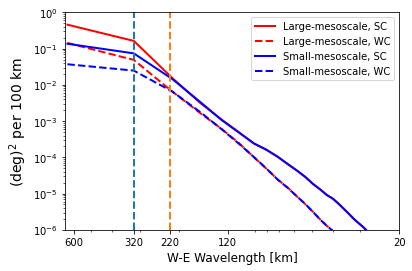

In [42]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
#plt.semilogy(wavenumber_zonal_Strong, PSD_full_Strong[:].mean(axis = (0, 1)), linewidth = 2.5, color = 'green')
#plt.semilogy(wavenumber_zonal_Weak, PSD_full_Weak[:].mean(axis = (0, 1)), linewidth = 2.5, color = 'green', linestyle = '--')
plt.semilogy(100/wavenumber_zonal_Strong, PSD_zonal_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'red')
plt.semilogy(100/wavenumber_zonal_Weak, PSD_zonal_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'red', linestyle = '--')
plt.semilogy(100/wavenumber_300_Strong, PSD_300_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue')
plt.semilogy(100/wavenumber_300_Weak, PSD_300_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue', linestyle = '--')
plt.semilogy(np.repeat(320, wavenumber_300_Weak.shape), np.arange(1e-6, 1e0,0.007751930232558139), linewidth = 2, linestyle = '--')
plt.semilogy(np.repeat(220, wavenumber_300_Weak.shape), np.arange(1e-6, 1e0,0.007751930232558139), linewidth = 2, linestyle = '--')
ax.set_xscale('log')
plt.ylim([1e-6, 1e0])
plt.xlim([660, 50])
#plt.text(450, 1e-4, '320 km', fontsize = 14)
#plt.text(210, 1e-4, '220 km', fontsize = 14)
plt.xlabel('W-E Wavelength [km]', fontsize = 12)
#plt.xlabel('W-E Wavenumber [cycles per 100km]', fontsize = 14)
plt.ylabel('$(\deg)^2$ per 100 km', fontsize = 14)
plt.xticks([600, 320, 220, 120, 20], [600, 320, 220, 120, 20])
plt.legend(['Large-mesoscale, SC', 'Large-mesoscale, WC', 'Small-mesoscale, SC',  'Small-mesoscale, WC'], fontsize = 10) #'SSTA SC', 'SSTA WC', 
plt.savefig('./Fig03_SSTA_power_spectra.png', dpi = 120)

In [43]:
x_rho, y_rho = heat_zonal.x_rho.data,heat_zonal.y_rho.data

<ipython-input-44-faa6487f9c4f>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax1.pcolormesh(X, Y, SST_full_Strong[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
<ipython-input-44-faa6487f9c4f>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = ax2.pcolormesh(X, Y, SST_full_Weak[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
<ipython-input-44-faa6487f9c4f>:22: MatplotlibDeprecationWarning: shading='fl

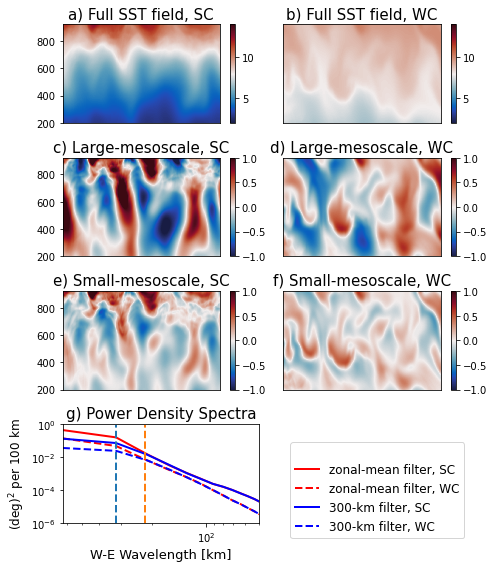

In [44]:
X, Y= x_rho[0, 60:350, 60:1062]/1000, y_rho[0, 60:350, 60:1062]/1000
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(figsize = (7, 8), nrows = 4, ncols = 2)

#Sept. Heating/cooling and adv
vmin, vmax = 2, 14
#plt.subplot(421)
ax1.set_title('a) Full SST field, SC', fontsize = 15)
im1 = ax1.pcolormesh(X, Y, SST_full_Strong[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im1, ax=ax1)
im1.axes.get_xaxis().set_visible(False)

#plt.subplot(422)
ax2.set_title('b) Full SST field, WC', fontsize = 15)
im2 = ax2.pcolormesh(X, Y, SST_full_Weak[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im2, ax=ax2)
im2.axes.get_xaxis().set_visible(False)
im2.axes.get_yaxis().set_visible(False)

#plt.subplot(423)
vmin, vmax = -1, 1
ax3.set_title('c) Large-mesoscale, SC', fontsize = 15) # SST anomalies
im3 = ax3.pcolormesh(X, Y, SSTA_zonal_Strong[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
im3.axes.get_xaxis().set_visible(False)
fig.colorbar(im3, ax=ax3)

#plt.subplot(424)
ax4.set_title('d) Large-mesoscale, WC', fontsize = 15)
im4 = ax4.pcolormesh(X, Y, SSTA_zonal_Weak[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
im4.axes.get_xaxis().set_visible(False)
im4.axes.get_yaxis().set_visible(False)
fig.colorbar(im4, ax=ax4)

#vmin, vmax = -50, 50
ax5.set_title('e) Small-mesoscale, SC', fontsize = 15)
im5 = ax5.pcolormesh(X, Y, SSTA_300_Strong[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
ax5.set_xlabel('Distance(km)')
im5.axes.get_xaxis().set_visible(False)
fig.colorbar(im5, ax=ax5)

ax6.set_title('f) Small-mesoscale, WC', fontsize = 15)
im6 = ax6.pcolormesh(X, Y, SSTA_300_Weak[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
ax6.set_xlabel('Distance(km)')
im6.axes.get_xaxis().set_visible(False)
im6.axes.get_yaxis().set_visible(False)
fig.colorbar(im6, ax=ax6)

ax7.set_title('g) Power Density Spectra', fontsize = 15)
#im7 = ax7.pcolormesh(X, Y, temp_diff_SC_3[8, 60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
l1 = ax7.semilogy(100/wavenumber_zonal_Strong, PSD_zonal_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'red')
l2 = ax7.semilogy(100/wavenumber_zonal_Weak, PSD_zonal_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'red', linestyle = '--')
l5 = ax7.semilogy(100/wavenumber_300_Strong, PSD_300_Strong[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue')
l6 = ax7.semilogy(100/wavenumber_300_Weak, PSD_300_Weak[:].mean(axis = (0, 1)), linewidth = 2, color = 'blue', linestyle = '--')
ax7.semilogy(np.repeat(320, wavenumber_300_Weak.shape), np.arange(1e-6, 1e0,0.007751930232558139), linewidth = 2, linestyle = '--')
ax7.semilogy(np.repeat(220, wavenumber_300_Weak.shape), np.arange(1e-6, 1e0,0.007751930232558139), linewidth = 2, linestyle = '--')
ax7.set_xscale('log')
ax7.set_ylim([1e-6, 1e0])
ax7.set_xlim([640, 50])
ax7.set_xlabel('W-E Wavelength [km]', fontsize = 13)
#plt.xlabel('W-E Wavenumber [cycles per 100km]', fontsize = 14)
ax7.set_ylabel('$(\deg)^2$ per 100 km', fontsize = 12)
#ax7.set_xticklabels(['600', '320', '220', '120'], minor = True, rotation=45)
plt.xticks([600, 320, 220, 120, 20], [600, 320, 220, 120, 20])
ax8.axis('off')

line_labels = ['zonal-mean filter, SC', 'zonal-mean filter, WC', '300-km filter, SC',  '300-km filter, WC']
fig.legend([l1, l2, l5, l6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower right",   # Position of legend
           borderaxespad = 2.5,    # spacing around legend box
           title=" ", # Title for the legend
           prop={'size': 12})

plt.tight_layout()
#plt.savefig('SSTA.png')